In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.optimizers import Adam

In [3]:
train_data = pd.read_csv(r"Desktop/fashion-mnist_train.csv")
test_data = pd.read_csv(r"Desktop/fashion-mnist_test.csv")

In [4]:
X_train = train_data.iloc[:, 1:].values  # Get pixel values
y_train = train_data.iloc[:, 0].values    # Get labels
X_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values

In [5]:
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [6]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)


Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 52s 31ms/step - accuracy: 0.8009 - loss: 0.5586 - val_accuracy: 0.8508 - val_loss: 0.4233
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.8650 - loss: 0.3738 - val_accuracy: 0.8652 - val_loss: 0.3738
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 46s 31ms/step - accuracy: 0.8835 - loss: 0.3175 - val_accuracy: 0.8732 - val_loss: 0.3565
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.8975 - loss: 0.2821 - val_accuracy: 0.8704 - val_loss: 0.3546
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 31ms/step - accuracy: 0.9091 - loss: 0.2516 - val_accuracy: 0.8807 - val_loss: 0.3290
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 33ms/step - accuracy: 0.9185 - loss: 0.2248 - val_accuracy: 0.8822 - val_loss: 0.3341
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 33ms/step - accuracy: 0.9252 - loss: 0.2059 - val_accuracy: 0.8857 - val_loss: 0.3330
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 87s 36ms/step - accuracy: 0.9333 -

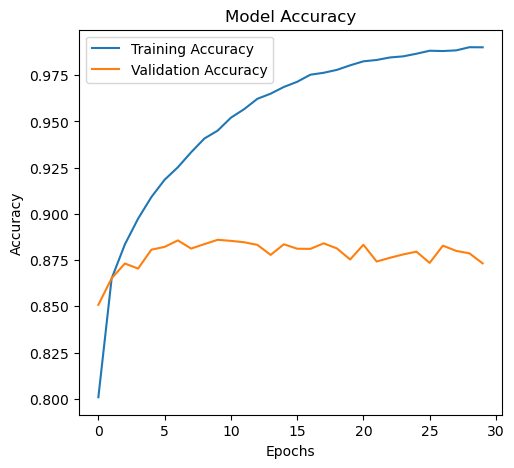

In [9]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()


In [10]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8800 - loss: 0.6410 
Test accuracy: 0.8800


In [11]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1000
           1       0.98      0.97      0.98      1000
           2       0.88      0.75      0.81      1000
           3       0.88      0.91      0.89      1000
           4       0.79      0.85      0.82      1000
           5       0.97      0.94      0.96      1000
           6       0.64      0.75      0.69      1000
           7       0.92      0.96      0.94      1000
           8       0.97      0.95      0.96      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


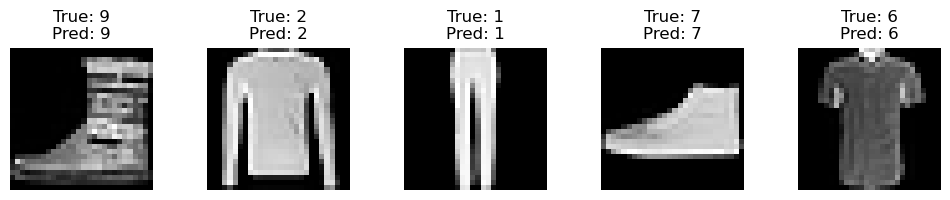

In [12]:
num_images = 5
random_indices = np.random.choice(X_test.shape[0], num_images, replace=False)

plt.figure(figsize=(10, 2))
for i, idx in enumerate(random_indices):
    test_image = X_test[idx]
    true_label = y_test[idx]
    predicted_label = np.argmax(model.predict(test_image.reshape(1, 28, 28, 1)))

    plt.subplot(1, num_images, i + 1)
    plt.imshow(test_image, cmap='gray')
    plt.title(f"True: {true_label}\nPred: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()
